# Detecting Insults in Social Commentary

## 1. Business Understanding

### 1.1 Project Description

In today's digital age, online discussions and social media have become an integral part of our lives. However, with the convenience of online communication comes the challenge of moderating and ensuring respectful discourse. This project aims to address a critical issue: **detecting and identifying insulting comments in social commentary**.

The project focuses on the task of identifying comments that are intended to insult or demean participants in a conversation. These comments may contain profanity, offensive language, racial slurs, or other forms of disrespect. It's **important to note** that we are specifically interested in comments that target participants of the discussion, not public figures or celebrities.

### 1.2 Project Objectives

**Project Objectives**

1. **Classifier Development:** The primary objective is to build a machine learning classifier that can accurately predict whether a given comment is insulting. This classifier should assign a probability score to each comment, indicating the likelihood of it being an insult.

2. **Accuracy Priority:** Maximize accuracy while minimizing false positives and false negatives, achieving a balanced model.

3. **Real-time Detection:** Develop a near-real-time model for automatic insult detection in online conversations.

4. **Generalization:** Ensure the model handles diverse insults, including explicit and subtle forms, promoting generalizability.

5. **Data Privacy:** Adhere to strict data protection standards, using comments solely for moderation purposes.

6. **Scalable Solution:** Create a scalable system to process high volumes of user-generated content efficiently.

7. **Ethical Compliance:** Address ethical concerns, including potential biases and fairness in the insult detection system.

8. **Collaboration:** Collaborate with online platforms and communities for system implementation and refinement.


## 2. Data Understanding

To begin the project, let's analyze the available data. We'll create dataframes with the necessary input files, explore the data, and describe all the columns. Understanding the data is essential for developing an effective insult detection model.



### Importing Packages

In [2]:
import pandas as pd
import nltk                                # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from sklearn.base import BaseEstimator
import numpy as np
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize


### 2.1. Importing data

In [3]:
# Load the datasets
verification_set = pd.read_csv('dataset/impermium_verification_set.csv')
verification_labels = pd.read_csv('dataset/impermium_verification_labels.csv')
test = pd.read_csv('dataset/test.csv')
test_with_solutions = pd.read_csv('dataset/test_with_solutions.csv')
train = pd.read_csv('dataset/train.csv')
sample_submission_null = pd.read_csv('dataset/sample_submission_null.csv')



### 2.2. Data exploration
### 2.2.1 Columns description

#### **Verification Set**:
This dataset is used for verification purposes during model development and testing.






In [4]:
# Print the first 10 rows of the verificationSet DataFrame
print("verification_set:")
print(verification_set.head(10))

verification_set:
   id  Insult             Date  \
0   1     NaN  20120603163526Z   
1   2     NaN  20120531215447Z   
2   3     NaN  20120823164228Z   
3   4     NaN  20120826010752Z   
4   5     NaN  20120602223825Z   
5   6     NaN  20120603202442Z   
6   7     NaN  20120603163604Z   
7   8     NaN  20120602223902Z   
8   9     NaN  20120528064125Z   
9  10     NaN  20120603071243Z   

                                             Comment        Usage  
0                 "like this if you are a tribe fan"  PrivateTest  
1              "you're idiot......................."  PrivateTest  
2  "I am a woman Babs, and the only "war on women...  PrivateTest  
3  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...  PrivateTest  
4  "haha green me red you now loser whos winning ...  PrivateTest  
5  "\nMe and God both hate-faggots.\n\nWhat's the...  PrivateTest  
6  "Oh go kiss the ass of a goat....and you DUMMY...  PrivateTest  
7                  "Not a chance Kid, you're wrong."  PrivateTe

#### **Verification Labels**:
This dataset provides labels for the 'verification_set,' with '0' indicating non-insulting and '1' indicating insulting comments.


In [5]:
# Print the first 10 rows of the verification labels
print("verification_labels:")
print(verification_labels.head(10))

verification_labels:
   id  Insult             Date  \
0   1       0  20120603163526Z   
1   2       1  20120531215447Z   
2   3       1  20120823164228Z   
3   4       1  20120826010752Z   
4   5       1  20120602223825Z   
5   6       0  20120603202442Z   
6   7       1  20120603163604Z   
7   8       0  20120602223902Z   
8   9       0  20120528064125Z   
9  10       1  20120603071243Z   

                                             Comment        Usage  
0                 "like this if you are a tribe fan"  PrivateTest  
1              "you're idiot......................."  PrivateTest  
2  "I am a woman Babs, and the only "war on women...  PrivateTest  
3  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...  PrivateTest  
4  "haha green me red you now loser whos winning ...  PrivateTest  
5  "\nMe and God both hate-faggots.\n\nWhat's the...  PrivateTest  
6  "Oh go kiss the ass of a goat....and you DUMMY...  PrivateTest  
7                  "Not a chance Kid, you're wrong."  Privat

#### **Test**:
The main test dataset used to make predictions with the trained machine learning model.

In [6]:
# Print the first 10 rows of the test data frame
print("test:")
print(test.head(10))

test:
   id             Date                                            Comment
0   1  20120603163526Z                 "like this if you are a tribe fan"
1   2  20120531215447Z              "you're idiot......................."
2   3  20120823164228Z  "I am a woman Babs, and the only "war on women...
3   4  20120826010752Z  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...
4   5  20120602223825Z  "haha green me red you now loser whos winning ...
5   6  20120603202442Z  "\nMe and God both hate-faggots.\n\nWhat's the...
6   7  20120603163604Z  "Oh go kiss the ass of a goat....and you DUMMY...
7   8  20120602223902Z                  "Not a chance Kid, you're wrong."
8   9  20120528064125Z            "On Some real Shit FUck LIVE JASMIN!!!"
9  10  20120603071243Z  "ok but where the hell was it released?you all...


#### **Test with Solutions**
Similar to the "test" dataset, but includes the ground truth or correct answers (solutions) for evaluation purposes. Used to assess model performance after predictions are made.

In [7]:
# Print the first 10 rows of the test_with_solutions data frame
print("test_with_solutions:")
print(test_with_solutions.head(10))

test_with_solutions:
   Insult             Date                                            Comment  \
0       0              NaN  "THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...   
1       0  20120618222256Z  "@ian21\xa0"Roger Clemens is the fucking man, ...   
2       1  20120618213617Z  "Agree with Alan you are an extremest idiot.  ...   
3       0              NaN  "Really?\\n\\nI see Marc Lamont Hill on variou...   
4       0  20120620003825Z  "Really suck isn't the word, when many of our ...   
5       0              NaN  "...after a couple guys like him rape him firs...   
6       0  20120529201500Z   "Matthews mentored Perry at USC.  Bodes well..."   
7       0  20120619145613Z  "How about we accept facts and patiently wait ...   
8       1  20120609165037Z  "To engage in an intelligent debate with you i...   
9       0  20120612145537Z  "Same reason no one cared Obama did cocaine, w...   

         Usage  
0   PublicTest  
1   PublicTest  
2   PublicTest  
3  PrivateTest  
4 

#### **Train**:
The training dataset used for training the machine learning model. It contains labeled data (comments with known insult labels) to develop and train the insult detection model.

In [8]:
# Print the first 10 rows of the train data frame
print("train:")
print(train.head(10))

train:
   Insult             Date                                            Comment
0       1  20120618192155Z                               "You fuck your dad."
1       0  20120528192215Z  "i really don't understand your point.\xa0 It ...
2       0              NaN  "A\\xc2\\xa0majority of Canadians can and has ...
3       0              NaN  "listen if you dont wanna get married to a man...
4       0  20120619094753Z  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...
5       0  20120620171226Z  "@SDL OK, but I would hope they'd sign him to ...
6       0  20120503012628Z                      "Yeah and where are you now?"
7       1              NaN  "shut the fuck up. you and the rest of your fa...
8       1  20120502173553Z  "Either you are fake or extremely stupid...may...
9       1  20120620160512Z  "That you are an idiot who understands neither...


## 3. Data preparation and pre-processing

We extract comments and its labels into one dataframe.

In [10]:
comments = train[['Insult', 'Comment']].copy()
print(comments)

      Insult                                            Comment
0          1                               "You fuck your dad."
1          0  "i really don't understand your point.\xa0 It ...
2          0  "A\\xc2\\xa0majority of Canadians can and has ...
3          0  "listen if you dont wanna get married to a man...
4          0  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...
...      ...                                                ...
3942       1  "you are both morons and that is never happening"
3943       0  "Many toolbars include spell check, like Yahoo...
3944       0  "@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F...
3945       0  "How about Felix? He is sure turning into one ...
3946       0  "You're all upset, defending this hipster band...

[3947 rows x 2 columns]


In [11]:
print(len(comments))



3947


### 3.1. Data cleaning

Next, we will develop a text preprocessing function that will be applied to the comment text.

# Remove hyperlinks, Twitter marks and styles

In [12]:
# Printing comments containing specific characters like '@' and 'https' to take as a sample
print(comments[comments['Comment'].str.contains('@|https', case=False)])


      Insult                                            Comment
5          0  "@SDL OK, but I would hope they'd sign him to ...
10         0  "@jdstorm dont wish him injury but it happened...
12         0       "@tonnyb  Or they just don't pay attention "
14         0  "@barrettmarson Huh? Her income was $21,912. H...
20         0  "@EephusBlue\xa0Makes you want to say "Mike Ma...
...      ...                                                ...
3923       0                    "@mikieboy - In a nutshell :-)"
3924       1  "@Crissa:disqus LaRaza (The Race), NBP. Nation...
3933       0  "@Ritual Reality No I am simply saying that ba...
3941       0  "@Sara Besleaga Griji, doruri sau dorin\\xc8\\...
3944       0  "@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F...

[270 rows x 2 columns]


In [13]:
# We take a sample comment
comment = comments['Comment'][1078]
print(comment)

"@berethor099 Go ahead and try, dude. Go - fucking - ahead."


In [14]:
# We download the stopwords from Natural Language Toolkit

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
print('\033[92m' + comment)
print('\033[94m')

# remove the "" from the end and start of the sentences
comment1 = comment.strip('"')

# remove hyperlinks
comment1 = re.sub(r'https?://[^\s\n\r]+', '', comment1)

# only removing the hash # sign from the word
comment1 = re.sub(r'#', '', comment1)

print(comment1)

"@berethor099 Go ahead and try, dude. Go - fucking - ahead."

@berethor099 Go ahead and try, dude. Go - fucking - ahead.


Remove unwanted characters, replace certain words and phrases

In [16]:
def preprocessing(sentence):
    cleanr = re.compile('<.*?>')

    regex = "[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
    regex1 = "(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][" \
             "a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2," \
             "}|www\.[a-zA-Z0-9]\.[^\s]{2,}) "
    regex2 = "(www | http: | https:)+[ ^\s]+[\w]"
    regex3 = r'\b\w*\d+\w*\b'
    s0 = sentence

    s0 = s0.lower()
    s0 = s0.replace("\\\\n", " ")
    s0 = s0.replace("\\n", " ")
    s0 = s0.replace("\\t", " ")
    s0 = s0.replace("\\\\xc2", " ")
    s0 = s0.replace("\\\\xa0", " ")
    s0 = s0.replace("\\\\xa0", " ")
    s0 = s0.replace("\\[\\w]", ' ')
    s0 = re.sub(r"\\[a-zA-Z0-9.]*", "", s0)

    s0 = re.sub("([a-zA-Z0-9.?!#*])\\1\\1+", "\\1", s0)  # brooooook->brook

    s0 = re.sub(regex, "", s0)  # url
    s0 = re.sub(r'http\S+|www\S+', '', s0)
    s0 = re.sub(regex1, "", s0)
    s0 = re.sub(cleanr, '', s0)  # html tags
    # Use re.sub to replace matched usernames with an empty string
    s0 = re.sub(regex3, "", s0)  # username

    # string = ":-/)"
    # ##  REMOVING SMILEYS
    # s0=re.sub(string,"  smiley",s0);
    # # s0=re.sub("\[\]+","",s0)            #remove \
    s0 = s0.strip()
    s0 = s0.replace(" wont ", " will not ")
    s0 = s0.replace(" won't ", " will not ")
    s0 = s0.replace(" don't ", " do not ")
    s0 = s0.replace(" didn't ", " did not ")
    s0 = s0.replace("Didn't ", "Did not ")
    s0 = s0.replace(" i'll", " I will")
    s0 = s0.replace(" I'll", " I will")
    s0 = s0.replace("I'll", "I will")
    s0 = s0.replace(" can't", " cannot")
    s0 = s0.replace(" shouldn't", " should not")
    s0 = s0.replace(" im ", " i am ")
    s0 = s0.replace("ain't", "is not")
    s0 = s0.replace("'ll", " will")
    s0 = s0.replace("'t[. ]", " not")
    s0 = s0.replace(" u ", " you ")
    s0 = s0.replace(" r ", " are ")
    s0 = s0.replace(" m ", " am ")
    s0 = s0.replace(" u'r ", " you are ")
    s0 = s0.replace(" you'r ", "you are ")
    s0 = s0.replace("'ve", " have")
    s0 = s0.replace("'s", " is")
    s0 = s0.replace("'re", " are")
    s0 = s0.replace("'d", " would")
    s0 = s0.replace("rly", " really")
    s0 = s0.replace(" fu ", " fuck you")
    s0 = re.sub("([a-zA-Z0-9.]+)\\1\\1+", " ", s0)  # lolololol->lol
    s0 = re.sub("[&*?!#^%`~$@]{4}", "-TOKEN-", s0)  # &*$!^@->>>>token
    s0 = s0.strip()
    s0 = re.sub(r'[@#][\w.]*', "-PRON-", s0)  # @username with YOU

    
    return s0

# Tokenize the string

In [17]:
print('\033[92m' + comment1)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
comment_tokens = tokenizer.tokenize(comment1)

print('Tokenized string:')
print(comment_tokens)

@berethor099 Go ahead and try, dude. Go - fucking - ahead.

Tokenized string:
['go', 'ahead', 'and', 'try', ',', 'dude', '.', 'go', '-', 'fucking', '-', 'ahead', '.']


# Remove stop words and punctuations

In [18]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We might need to customize the stop words list for our applications. Since the model should diffrenciate between insults to users of the forum and others.

In [19]:
print('\033[92m')
print(comment_tokens)
print('\033[94m')
comment_clean = []

for word in comment_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        comment_clean.append(word)

print('Removed stop words and punctuation:')
print()
print(comment_clean)


['go', 'ahead', 'and', 'try', ',', 'dude', '.', 'go', '-', 'fucking', '-', 'ahead', '.']

Removed stop words and punctuation:

['go', 'ahead', 'try', 'dude', 'go', 'fucking', 'ahead']


# Stemming
Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

In [20]:
print('\033[92m')
print(comment_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
comment_stem = []

for word in comment_clean:
    stem_word = stemmer.stem(word)  # stemming word
    comment_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(comment_stem)


['go', 'ahead', 'try', 'dude', 'go', 'fucking', 'ahead']

stemmed words:
['go', 'ahead', 'tri', 'dude', 'go', 'fuck', 'ahead']



Now we will create the process_comment() function that sums all the steps mentioned in the previous steps

In [21]:
def process_comment(df):
    # Iterate through the 'Comment' column in the DataFrame
    for index, row in df.iterrows():
        comment = row['Comment']
        comment1 = preprocessing(comment)  # Apply your preprocessing function to the comment
        comment1 = comment1.strip('"')
        comment_tokens = tokenizer.tokenize(comment1)
        comment_clean = []

        for word in comment_tokens:
            if (word not in stopwords_english and
                    word not in string.punctuation):
                comment_clean.append(word)

        comment_stem = []

        for word in comment_clean:
            stem_word = stemmer.stem(word)
            comment_stem.append(stem_word)

        # Overwrite the 'Comment' column in the DataFrame with the processed comment
        df.at[index, 'Comment'] = ' '.join(comment_stem)

    return df


Let's test our function


In [22]:
# Create a new DataFrame to store the preprocessed comments
preprocessed_comments = comments.copy()

# Call the process_comment function to preprocess the comments in 'preprocessed_comments' DataFrame
preprocessed_comments = process_comment(preprocessed_comments)

comments = train[['Insult', 'Comment']].copy()


In [23]:
print(preprocessed_comments)
print(comments)

      Insult                                            Comment
0          1                                           fuck dad
1          0        realli understand point seem mix appl orang
2          0  major canadian wrong unless support idea noth ...
3          0  listen dont wanna get marri man women dont wou...
4          0  c b xu bi c ho kh c ng ng cu chi nh c ho kh c ...
...      ...                                                ...
3942       1                                 moron never happen
3943       0  mani toolbar includ spell check like yahoo exa...
3944       0  pron--pron sioux fall told boy call around tod...
3945       0  felix sure turn one hell start pitcher think g...
3946       0  upset defend hipster band.and douch read news ...

[3947 rows x 2 columns]
      Insult                                            Comment
0          1                               "You fuck your dad."
1          0  "i really don't understand your point.\xa0 It ...
2          0  "

### 3.2. Data visualization

Here we will compare between two random rows before and after pre-processing

In [24]:
from tabulate import tabulate

# Select the same two comments from the original and preprocessed DataFrames
original_comments_to_compare = [comments['Comment'].iloc[17], comments['Comment'].iloc[1000]]
preprocessed_comments_to_compare = [preprocessed_comments['Comment'].iloc[17], preprocessed_comments['Comment'].iloc[1000]]

# Create a DataFrame to display the comments
comparison_data = {'Original Comments': original_comments_to_compare, 'Preprocessed Comments': preprocessed_comments_to_compare}
comparison_df = pd.DataFrame(comparison_data)

# Display the DataFrame as a table
print(tabulate(comparison_df, headers='keys', tablefmt='pretty'))


+---+---------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------+
|   |                                               Original Comments                                               |                       Preprocessed Comments                       |
+---+---------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------+
| 0 | "Oh! & cheating as well...1966 cup was a cheat fest, & you still dare to post that comment..shame on you lol" | oh cheat well cup cheat fest still dare post comment .. shame lol |
| 1 |                                  "Looks like there's fixin to be a shootout"                                  |                     look like fixin shootout                      |
+---+-----------------------------------------------------------------

Then, we plot a comparison between a sample of 30 comments before and after pre-processing

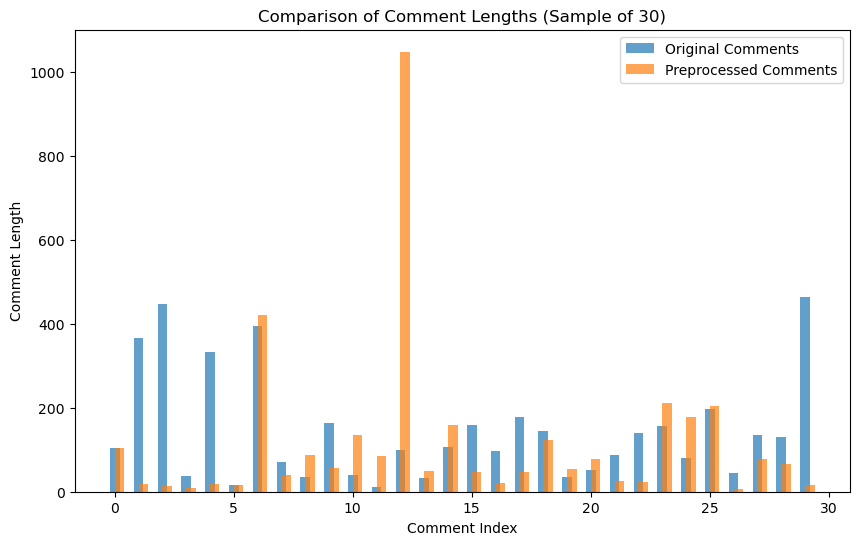

In [25]:
import matplotlib.pyplot as plt
import random

# Sample 30 comments from the original and preprocessed DataFrames
sample_size = 30
original_sample = random.sample(comments['Comment'].tolist(), sample_size)
preprocessed_sample = random.sample(preprocessed_comments['Comment'].tolist(), sample_size)

# Calculate the length of each comment in the samples
original_comment_lengths = [len(comment) for comment in original_sample]
preprocessed_comment_lengths = [len(comment) for comment in preprocessed_sample]

# Create a bar chart to compare comment lengths
plt.figure(figsize=(10, 6))
plt.bar(range(sample_size), original_comment_lengths, width=0.4, label='Original Comments', align='center', alpha=0.7)
plt.bar(range(sample_size), preprocessed_comment_lengths, width=0.4, label='Preprocessed Comments', align='edge', alpha=0.7)
plt.xlabel('Comment Index')
plt.ylabel('Comment Length')
plt.title('Comparison of Comment Lengths (Sample of 30)')
plt.legend()
plt.show()


We generate a word cloud to visualize the most frequent words

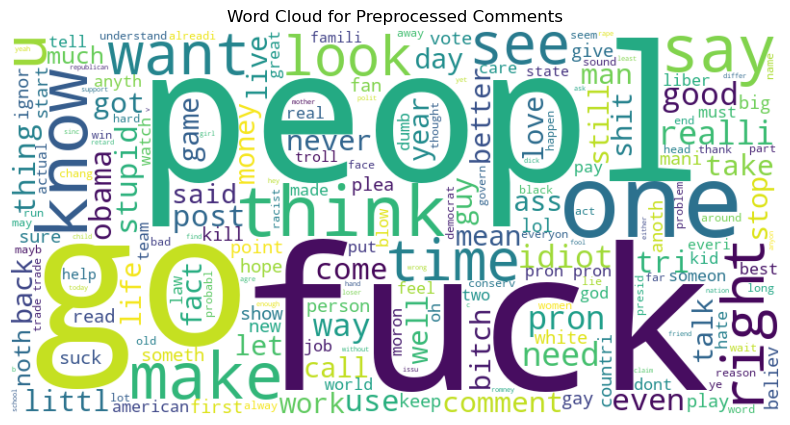

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all preprocessed comments into a single text
preprocessed_text = ' '.join(preprocessed_comments['Comment'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Preprocessed Comments')
plt.show()


# I. ***First method***

### 3.3. Feature selection

The code defines a custom text data transformer that calculates three features for each document:

- Number of words in the document.
- Total number of characters in the document.
- Ratio of uppercase characters to the total number of characters.



In [27]:
class CleanTransformer(BaseEstimator):

    def __init__(self):
        with open('badlist.txt') as file:
            badwords = [line.strip() for line in file.readlines()]
        self.badwords = badwords

    def fit(self):
        return self

    def transform(self, docs):
        n_words = []
        n_chars = []
        caps_ratio = []

        for doc in docs:
            n_words.append(len(doc.split()))
            n_chars.append(len(doc))

            caps_ratio.append(np.sum([c.isupper() for c in doc]) / len(doc))

        return np.array([n_words, n_chars, caps_ratio]).T

In [28]:
ps = PorterStemmer()
nlp = spacy.load('en_core_web_sm')

In [29]:
def fetchlist(file):
    filecontent = open(file)
    lines = filecontent.readlines()
    l = []
    for line in lines:
        l.append(line.strip())
    # print(list)
    return l

In [30]:
def customfind(sent, phrase):
    pp = phrase.split(" ")
    if len(pp) > 1:
        if sent.find(phrase) != -1:
            return True;
    else:
        words = sent.split(" ")
        for word in words:
            if (word == phrase):
                return True
    return False


***Feature extraction using a custom defined transformer***

**Key Features Extracted**:
1. The count and ratio of "bad words" (offensive or inappropriate words) in the text.
2. The count and ratio of "good words" (possibly positive or non-offensive words) in the text.
3. The ratio of sentence length to assess if sentences are relatively short.
4. The ratio of uppercase characters in the text.
5. An "offense score" based on specific rules and context-related features.
6. Two lexical scores, `lex_score1` and `lex_score2`, measuring the distance between bad words and the word "you" in the text.

This code is designed to preprocess and extract features from text data with the specific purpose of identifying offensive or inappropriate language and context within the text. It's useful for tasks related to text classification, sentiment analysis, or content moderation.

**Output**: The output of this code is a set of extracted features for each input document. These features can be used as input data for further machine learning tasks, allowing models to learn patterns and make predictions based on the extracted information. The code leverages various natural language processing (NLP) techniques and rules to calculate these features, including the identification of bad words, good words, sentence length, and context-based scoring. The features aim to provide insights into the nature of the text and its potential offensiveness or appropriateness.



In [126]:
class CleanTransformer(BaseEstimator):
    def __init__(self):
        self.badlist = fetchlist('sortedBadWords_for_checking.txt')
        self.goodlist = fetchlist('positives.txt')

    #         with open('badlist.txt') as file:
    #             badwords = [line.strip() for line in file.readlines()]
    #         self.badwords = badwords

    def get_feature_names(self):
        return np.array(['bcount', 'bratio', 'gcount', 'gratio', 'bgratio', 'len_ratio',
                         'caps_ratio', 'off_score', 'lex1', 'lex2'])

    def fit(self, X, y):
        # Train the classifier model using the provided X (input data) and y (labels)
        self.model.fit(X, y)

        return self

    def transform(self, docs):
        bcount = []
        bratio = []
        gcount = []
        gratio = []
        bgratio = []
        len_ratio = []
        caps_ratio = []
        off_score = []
        lex1 = []
        lex2 = []

        for i, doc in enumerate(docs):
            print(i, doc)
            #             bcount_ ,bratio_ = self._bad_count(doc, self.badlist)
            #             bcount.append(bcount_)
            #             bratio.append(bratio_)

            #             gcount_ ,gratio_ = self._good_count(doc, self.goodlist)
            #             gcount.append(gcount_)
            #             gratio.append(gratio_)

            #             bgratio.append(bcount_ / float(gcount_))

            #             len_ratio.append(self._sent_len_ratio(doc, 50))

            #             caps_ratio.append(self._caps_ratio(doc))
            send_list = [0, 1.5, .6, 0, 1, .4, .6, .3, .15, .8, .45]
            off_score.append(self._offense_score(doc, send_list, self.badlist, self.goodlist))
        # lex1.append(self._lex_score1(doc, self.badlist))
        #             lex2.append(self._lex_score2(doc, self.badlist))



        #             n_words.append(len(doc.split()))
        #             n_chars.append(len(doc))
        #             caps.append()
        #             caps_ratio.append(np.sum([c.isupper() for c in doc]) / len(doc))

        return np.array([bcount, bratio, gcount, gratio,
                         bgratio, len_ratio, caps_ratio, off_score, lex1, lex2]).T

    def _bad_count(self, document, badlist):
        count = 0
        for phrase_ in badlist:
            if customfind(document, phrase_):
                # print(phrase_)
                count = count + 1
        wl = len(word_tokenize(document))
        if wl == 0:
            print(document)
        return [count, count * 10 / float(wl)]

    def _good_count(self, document, goodlist):
        count = 1
        for phrase_ in goodlist:
            if customfind(document, phrase_):
                count = count + 1
        return [count, count * 10 / float(word_tokenize(document).__len__())]

    def _sent_len_ratio(self, sentence, shortis):
        short_sent = 0
        sent_tokens = sent_tokenize(sentence)
        for sent in sent_tokens:
            if len(sent) <= shortis:
                short_sent = short_sent + 1
        return float(short_sent) / sent_tokens.__len__()

    def _caps_ratio(self, document):
        uc_token = 0
        w_tokens = word_tokenize(document)
        words_analysed = 0
        # print(w_tokens)
        for word in w_tokens:
            # print(word)
            if len(word) > 1 and (
                                                            word != "'s" and word != "'S" and word != "'ll" and word != "'LL" and word != "n't" and word != "N'T" and word != "'re" and word != "'RE" and word != "'d" and word != "'D" and word != "'ve" and word != "'VE"):
                words_analysed = words_analysed + 1
                if word.isupper():
                    uc_token = uc_token + 1
                    # print(word, words_analysed, uc_token)
        val = uc_token / float(words_analysed)
        return val

    def _offense_score(self, document, in_list, badlist, goodlist):
        s1 = in_list[0]
        s2 = in_list[1]
        s3 = in_list[2]
        s4 = in_list[3]
        s5 = in_list[4]
        s6 = in_list[5]
        s7 = in_list[6]
        s8 = in_list[7]
        s9 = in_list[8]
        s10 = in_list[9]
        s11 = in_list[10]
        # s1 -for not in sibling -0
        # s2 -for you in sibling -1.5
        # s3 -for they in sibling -0.6
        # s4 -for 'nor, neither' in descendant -0
        # s5 -for you in descendant -1
        # s6 -for they in descendant -0.4
        # s7 -for you in parent's child -.6
        # s8 - for they in parent's child - .3
        # s9 - for otherwise -.2
        # s10 -for niece you - .8
        # s11 -for niece they - .45

        wordlist = ['yourself', 'your', 'yours', 'you', 'he', 'her', 'she', 'his', 'they', 'their', 'them', 'not',
                    'never', 'nobody', 'neither', 'nor', 'it', 'its']
        document = document.lower()
        doc = nlp(document)
        sentences_in_doc = doc.sents
        # print(doc)
        Flag = False
        # displacy.serve(doc, style='dep')
        score = 0
        token_no = 0
        for token in doc:
            # check if token is a curse word
            Flag = False
            stemmedword = ps.stem(token.text)
            if token_no + 1 < len(doc) and doc[token_no + 1].text in goodlist:
                Flag = True
            else:
                break
            if Flag:
                continue
            for child in token.head.children:
                if child.text == 'not' or child.text == 'never' or child.text == 'nobody':
                    score = score + s1
                    Flag = True
                    break
            if Flag: continue
            for child in token.head.children:

                if child.text == 'you' or child.text == 'yourself' or child.text == 'your' or child.text == 'yours' or child.text == 'it' or child.text == 'its':
                    score = score + s2
                    # print("Rule--",child)
                    Flag = True
                    break
            if Flag: continue
            for child in token.head.children:
                if child.text == 'they' or child.text == 'he' or child.text == 'she' or child.text == 'her' or child.text == 'their' or child.text == 'them' or child.text == 'his':
                    score = score + s3
                    Flag = True
                    break
            if Flag: continue

            # analysing 'descendant' relation
            for node in token.children:
                if node.text == 'neither' or node.text == 'nor':  # node.text=='not' or node.text='never' or
                    score = score + s4  # first descendant relation
                    Flag = True
                    break
                else:
                    for nodechild in node.children:
                        if nodechild.text == 'neither' or nodechild.text == 'nor':
                            score = score + (s4 / 2)  # grandchild descendant so score is halved
                            Flag = True
                            break
            if Flag: continue
            for node in token.children:
                if node.text == 'you' or child.text == 'yourself' or node.text == 'your' or node.text == 'yours' or node.text == 'it' or node.text == 'its':
                    score = score + s5
                    # print("Rule--",node)
                    Flag = True
                    break;
                else:
                    for nodechild in node.children:
                        if nodechild.text == 'you' or child.text == 'yourself' or nodechild.text == 'your' or nodechild.text == 'yours' or nodechild.text == 'it' or nodechild.text == 'its':
                            score = score + (s5 / 2)
                            # print("Rule--",node)
                            Flag = True
                            break
            if Flag: continue
            for node in token.children:
                if node.text == 'they' or node.text == 'he' or node.text == 'she' or node.text == 'her' or node.text == 'their' or node.text == 'them' or node.text == 'his':
                    score = score + s6
                    Flag = True
                    break;
                else:
                    for nodechild in node.children:
                        if nodechild.text == 'they' or nodechild.text == 'he' or nodechild.text == 'she' or nodechild.text == 'her' or nodechild.text == 'their' or nodechild.text == 'them' or nodechild.text == 'his':
                            score = score + (s6 / 2)
                            Flag = True
                            break
            if Flag: continue
            # analysing niece relation
            father = token.head
            # print("pohcha",father)
            for child in father.children:
                if child != token:
                    for grandchild in child.children:
                        if grandchild.text == 'you' or child.text == 'yourself' or grandchild.text == 'your' or grandchild.text == 'yours' or grandchild.text == 'it' or grandchild.text == 'its':
                            score = score + s10
                            # print("Rules--",child)
                            Flag = True
                            break;
            if Flag: continue
            for child in father.children:
                if child != token:
                    for grandchild in child.children:
                        if grandchild.text == 'they' or grandchild.text == 'he' or grandchild.text == 'she' or grandchild.text == 'her' or grandchild.text == 'their' or grandchild.text == 'them' or grandchild.text == 'his':
                            score = score + s11
                            # print("Rules--",child)
                            Flag = True
                            break;
            if Flag: continue
            # analysing 'UNCLE' relation
            if father.dep_ != 'ROOT':
                for desc in father.head.children:
                    if desc.text == 'you' or child.text == 'yourself' or desc.text == 'your' or desc.text == 'yours' or desc.text == 'it' or desc.text == 'its':
                        score = score + s7
                        # print("Rule--",desc)
                        Flag = True
                        break;
                if Flag: continue
                for desc in father.head.children:
                    if desc.text == 'they' or desc.text == 'he' or desc.text == 'she' or desc.text == 'her' or desc.text == 'their' or desc.text == 'them' or desc.text == 'his':
                        score = score + s8
                        Flag = True
                        break;
            if Flag:
                continue
            else:
                score = score + s9
                # print("Rule--last")
            token_no = token_no + 1
        return score

    def _lex_score1(self, document, badlist):
        nlp.vocab["you"].is_stop = False
        nlp.vocab["your"].is_stop = False
        nlp.vocab["yours"].is_stop = False
        nlp.vocab["yourself"].is_stop = False
        document = document.lower()
        sentences_l = sent_tokenize(document)
        # doc=nlp(document)
        lexscore = 0
        # sent_count=0
        for sentence in sentences_l:
            doc = nlp(sentence)
            # print(doc)
            badindexes = []
            youindexes = []
            for i in range(0, doc.__len__()):
                #         token=doc[i].lemma_
                # print(doc[i],"---",doc[i].is_stop)
                if (not doc[i].is_stop):
                    if doc[i].text == 'you' or doc[i].text == 'your' or doc[i].text == "your's" or doc[i].text == 'yours' or doc[i].text == 'yourself':
                        # print(i)
                        youindexes.append(i)
                        continue
                    if badlist.__contains__(doc[i].text):
                        badindexes.append(i)
                        continue
            for badindex in badindexes:
                for youindex in youindexes:
                    lexscore = lexscore + abs(badindex - youindex)
        nlp.vocab["you"].is_stop = True
        nlp.vocab["your"].is_stop = True
        nlp.vocab["yours"].is_stop = True
        nlp.vocab["yourself"].is_stop = True
        return lexscore / float(sentences_l.__len__())

    def _lex_score2(self, document, badlist):
        nlp.vocab["you"].is_stop = False
        nlp.vocab["your"].is_stop = False
        nlp.vocab["yours"].is_stop = False
        nlp.vocab["yourself"].is_stop = False
        document = document.lower()
        #     sentence=nlp(document)
        lexscore = 0
        doc = nlp(document)
        #     sent_count=0
        #         sent_count=sent_count+1

        # print(doc)
        badindexes = []
        youindexes = []
        for i in range(0, doc.__len__()):
            #         token=doc[i].lemma_
            # print(doc[i],"---",doc[i].is_stop)
            if (not doc[i].is_stop):
                if doc[i].text == 'you' or doc[i].text == 'your' or doc[i].text == "your's" or doc[i].text == 'yours' or doc[i].text == 'yourself':
                    # print(i)
                    youindexes.append(i)
                    continue
                if doc[
                    i].text in badlist:
                    badindexes.append(i)
                    continue
        for badindex in badindexes:
            for youindex in youindexes:
                lexscore = lexscore + abs(badindex - youindex)
        nlp.vocab["you"].is_stop = True
        nlp.vocab["your"].is_stop = True
        nlp.vocab["yours"].is_stop = True
        nlp.vocab["yourself"].is_stop = True
        return lexscore / float(doc.__len__())

In [127]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess your data
# Replace 'your_data.csv' with your actual dataset
data = process_comment(comments)
X = data['Comment']  # Assuming 'text_column' is the column containing text data
y = data['Insult']  # Assuming 'target_column' is the column containing target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with the CleanTransformer and a machine learning classifier (e.g., RandomForest)
pipeline = Pipeline([
    ('clean_transformer', CleanTransformer()),
    ('tfidf_vectorizer', TfidfVectorizer()),  # You can use TF-IDF or other text vectorization techniques
    ('classifier', RandomForestClassifier())  # You can use other classifiers like Logistic Regression
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


AttributeError: 'CleanTransformer' object has no attribute 'model'

Here we will use a transformer and a pretrained model "bert-base-uncased"

**Feature extraction using BERT**

This code is commented because we did save the features and there is no need to run it again. It takes too long to execute.

In [32]:
# from transformers import TFBertModel, BertTokenizer
# import tensorflow as tf
# import pandas as pd

# # Load your preprocessed_comments DataFrame
# # preprocessed_comments = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with your actual data file

# # Load the BERT model and tokenizer
# model_name = "bert-base-uncased"
#model = TFBertModel.from_pretrained(model_name)
# tokenizer = BertTokenizer.from_pretrained(model_name)

# # Tokenize your text data
# max_len = 128  # Set your desired maximum sequence length
# tokenized_comments = preprocessed_comments['Comment'].tolist()  # Convert to a list of strings

# # Pad the sequences to the fixed length
# features = []
# for text in tokenized_comments:
#     inputs = tokenizer(text, return_tensors="tf", padding='max_length', max_length=max_len, truncation=True)
#     outputs = model(**inputs)
#     feature_vector = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy().squeeze()
#     features.append(feature_vector)

# features = tf.stack(features)





In [37]:
# Define the path to the saved features file
features_load_path = "bert_features.npy"

# Load the features from the file
loaded_features = np.load(features_load_path)


In [ ]:
# Load the test dataset
test_data = pd.read_csv("dataset/impermium_verification_labels.csv")

# Apply the preprocess_comment function to the 'Comment' column in the verification dataset
verification_comment = test_data[['Insult', 'Comment']].copy()
processed_verification_comment = process_comment(verification_comment)

**Extract features from the verification set**

The code is commented because the we did run the code and saved the features, so there is no need to run it again.

In [ ]:
# # Load your verification dataset
# verification_data = pd.read_csv('dataset/impermium_verification_labels.csv')

# # Preprocess the verification data (tokenization, padding, etc.)
# max_len = 128  # Set your desired maximum sequence length
# verification_comments = verification_data['Comment'].tolist()

# # Convert the tokenized verification data to BERT features
# verification_features = []
# for text in verification_comments:
#     inputs = tokenizer(text, return_tensors="tf", padding='max_length', max_length=max_len, truncation=True)
#     outputs = model(**inputs)
#     feature_vector = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy().squeeze()
#     verification_features.append(feature_vector)

# verification_features = tf.stack(verification_features)


## 4. Modeling

Epoch 1/30
395/395 [==============================] - 35s 75ms/step - loss: 0.5113 - accuracy: 0.7629
Epoch 2/30
395/395 [==============================] - 22s 55ms/step - loss: 0.4358 - accuracy: 0.8021
Epoch 3/30
395/395 [==============================] - 22s 57ms/step - loss: 0.4033 - accuracy: 0.8171
Epoch 4/30
395/395 [==============================] - 22s 54ms/step - loss: 0.3798 - accuracy: 0.8297
Epoch 5/30
395/395 [==============================] - 23s 57ms/step - loss: 0.3546 - accuracy: 0.8444
Epoch 6/30
395/395 [==============================] - 22s 56ms/step - loss: 0.3207 - accuracy: 0.8642
Epoch 7/30
395/395 [==============================] - 23s 58ms/step - loss: 0.2886 - accuracy: 0.8769
Epoch 8/30
395/395 [==============================] - 27s 68ms/step - loss: 0.2559 - accuracy: 0.8913
Epoch 9/30
395/395 [==============================] - 23s 57ms/step - loss: 0.2154 - accuracy: 0.9121
Epoch 10/30
395/395 [==============================] - 23s 58ms/step - loss: 0.188

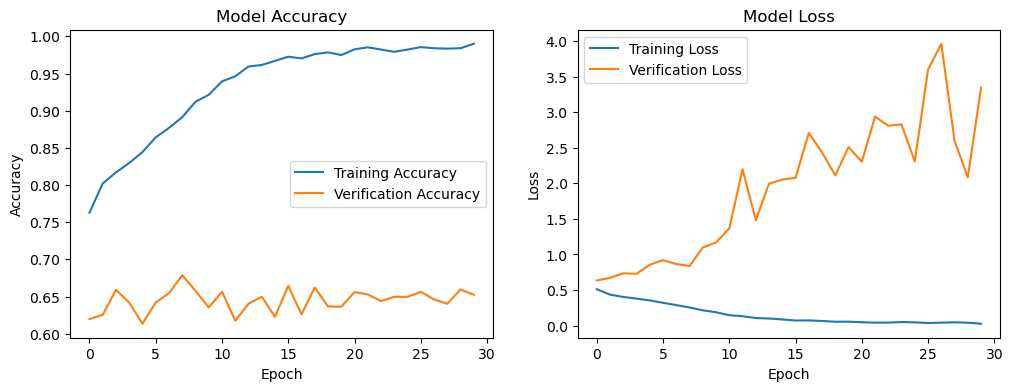

In [95]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Define a custom callback to calculate accuracy on training and verification data
class AccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, verification_features, verification_labels):
        super().__init__()
        self.verification_features = verification_features
        self.verification_labels = verification_labels
        self.training_accuracy_values = []
        self.verification_accuracy_values = []
        self.training_loss_values = []
        self.verification_loss_values = []

    def on_epoch_end(self, epoch, logs=None):
        # Calculate accuracy on the training data
        training_accuracy = logs.get('accuracy')
        training_loss = logs.get('loss')
        self.training_accuracy_values.append(training_accuracy)
        self.training_loss_values.append(training_loss)
        
        # Calculate accuracy on the verification data
        verification_loss, verification_accuracy = self.model.evaluate(self.verification_features, self.verification_labels, verbose=0)
        self.verification_accuracy_values.append(verification_accuracy)
        self.verification_loss_values.append(verification_loss)
        
        # Print the accuracies for both training and verification data
        print(f"Epoch {epoch + 1}/{self.params['epochs']}, Training Accuracy: {training_accuracy:.4f}, Verification Accuracy: {verification_accuracy:.4f}")

# Load the verification features from the file
verification_features_load_path = "verification_features.npy"
verification_features = np.load(verification_features_load_path)

# Load your verification dataset
# verification_data = pd.read_csv('impermium_verification_labels.csv')  # Load your verification dataset

# Define your target labels from the verification dataset (e.g., 'Insult' column)
verification_labels = test_data['Insult']

# Define the path to the saved features file
features_load_path = "bert_training_features.npy"

# Load the features from the file
loaded_features = np.load(features_load_path)

# Load your preprocessed_comments DataFrame
# preprocessed_comments = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with your actual data file

# Define your target labels (e.g., 'Insult' column)
target_labels = preprocessed_comments['Insult']

# Define your custom model with multiple hidden layers and dropout layers
input_layer = tf.keras.layers.Input(shape=(loaded_features.shape[1],))  # Use the shape of the loaded features
hidden_layer = tf.keras.layers.Dense(700, activation='relu')(input_layer)
dropout1 = tf.keras.layers.Dropout(0.2)(hidden_layer)  # Add a dropout layer
hidden_layer1 = tf.keras.layers.Dense(700, activation='relu')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.2)(hidden_layer1)  # Add another dropout layer
hidden_layer2 = tf.keras.layers.Dense(700, activation='relu')(dropout2)
hidden_layer3 = tf.keras.layers.Dense(700, activation='relu')(hidden_layer2)
dropout4 = tf.keras.layers.Dropout(0.2)(hidden_layer3)  # Add another dropout layer
hidden_layer4 = tf.keras.layers.Dense(700, activation='relu')(dropout4)
hidden_layer5 = tf.keras.layers.Dense(700, activation='relu')(hidden_layer4)
dropout6 = tf.keras.layers.Dropout(0.2)(hidden_layer5)  # Add another dropout layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dropout6)  # Output layer

custom_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
# Define the learning rate
learning_rate = 0.0001  # You can adjust this value as needed

# Compile your custom model with the modified learning rate
custom_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Create an instance of the custom accuracy callback
accuracy_callback = AccuracyCallback(verification_features, verification_labels)

# Train your custom model using the loaded BERT features and target labels
history = custom_model.fit(loaded_features, target_labels, epochs=30, batch_size=10, callbacks=[accuracy_callback])

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(accuracy_callback.verification_accuracy_values, label='Verification Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(accuracy_callback.verification_loss_values, label='Verification Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [104]:
from transformers import TFBertModel, BertTokenizer
import tensorflow as tf

# Load your custom model
# custom_model = load_your_model_function()  # Replace with your actual method for loading the trained model

# Load the BERT model and tokenizer
model_name = "bert-base-uncased"
model = TFBertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Input sentence to test
sentence = "moms ass"

# Tokenize the sentence
max_len = 128  # Set your desired maximum sequence length
inputs = tokenizer(sentence, return_tensors="tf", padding=True, truncation=True, max_length=max_len)

# Convert the tokenized sentence to BERT features
outputs = model(**inputs)
feature_vector = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy().squeeze()

# Make a prediction using the custom model
prediction = custom_model.predict(feature_vector[tf.newaxis])  # Pass the feature vector as a batch

# Interpret the prediction (e.g., if prediction > 0.5, it's an insult)
if prediction > 0.5:
    print("Insult")
    print(prediction)
else:
    print("Non-insult")
    print(prediction)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

1/1 [==============================] - 0s 35ms/step
Insult
[[0.9997929]]


## 5. Evaluation

In [128]:
tokenized_test_comments = test_data['Comment'].tolist()

test_features = []
for text in tokenized_test_comments:
    inputs = tokenizer(text, return_tensors="tf", padding='max_length', max_length=max_len, truncation=True)
    outputs = model(**inputs)
    feature_vector = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy().squeeze()
    test_features.append(feature_vector)

test_features = tf.stack(test_features)

# Make predictions using your custom model
for feature_vector in test_features:
    prediction = custom_model.predict(feature_vector[tf.newaxis])  # Pass the feature vector as a batch
    predictions.append(prediction)

# Interpret the predictions (e.g., thresholding at 0.5)
threshold = 0.5
insult_predictions = [1 if prediction > threshold else 0 for prediction in predictions]

# Calculate accuracy or other performance metrics
true_labels = test_data['Insult'].tolist()
accuracy = np.mean(np.array(insult_predictions) == np.array(true_labels))
print(f"Accuracy: {accuracy:.4f}")

# II. ***Second way***

This code processes and splits comments into training and testing sets, then trains and evaluates three classifiers (**Naive Bayes**, **Linear SVM**, and **Logistic Regression**) on both word-level and character-level TF-IDF features. It calculates and prints *accuracy*, generates confusion matrices to visualize predictions, and plots ROC curves with AUC scores to assess the models' ability to distinguish between insult and non-insult comments. The code provides a comprehensive evaluation of the classifiers' performance on insult detection using different feature representations.

## Importing packages

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import roc_auc_score, roc_curve

import pandas as pd
import numpy as np
import spacy

## 4. Modeling

Starting MultinomialNB Classifier
Naive Bayes (Word Gram): 0.7083916083916084
Naive Bayes (Character Gram): 0.6587412587412588
Naive Bayes (Word): Confusion matrix, without normalization
Naive Bayes (Character): Confusion matrix, without normalization


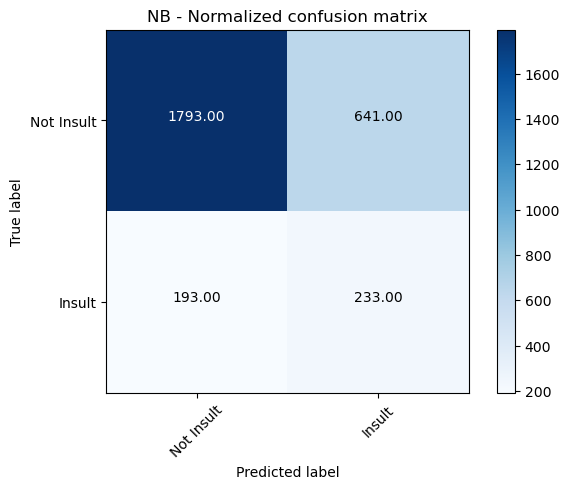

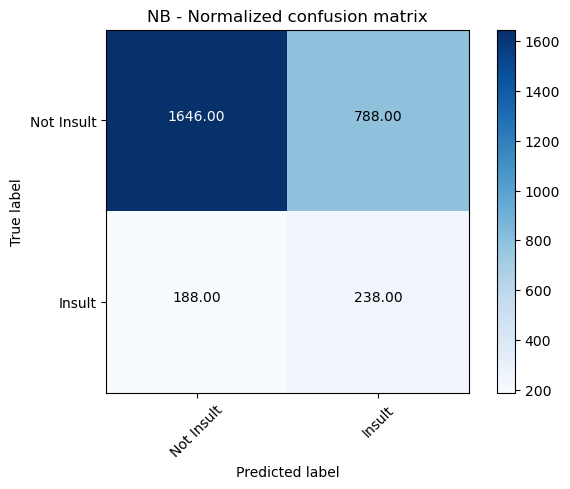

MultinomialNB (Words Gram): ROC Curve
MultinomialNB AUC (Word Gram): 0.76144390307884


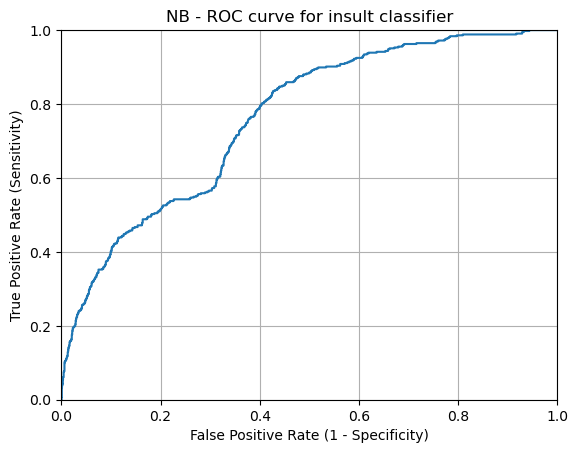

MultinomialNB (Character Gram): ROC Curve
MultinomialNB AUC (Character Gram): 0.7300729879137878


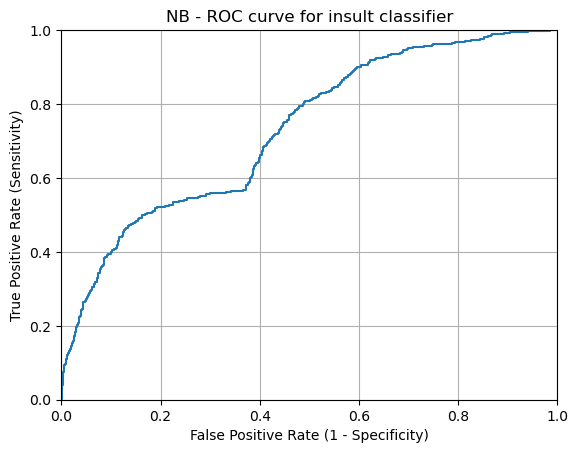

Starting SVM Classifier


D:\Program Files\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Program Files\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC (SVM) (Word Gram): 0.765034965034965
LinearSVC (SVM) (Character Gram): 0.7916083916083916
LinearSVC (SVM) (Word Gram): Confusion matrix, without normalization
LinearSVC (SVM) (Character Gram): Confusion matrix, without normalization


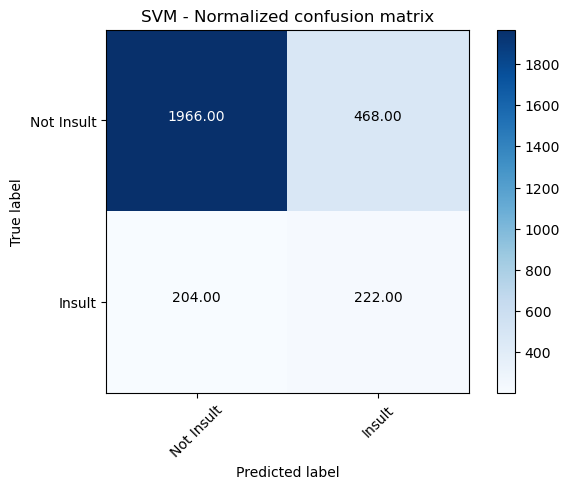

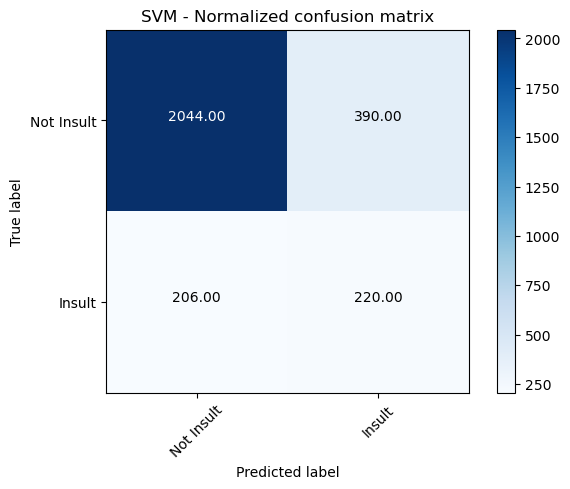

Starting Logistic Regression
Logistic Regression (Word Gram): 0.7174825174825175
Logistic Regression (Character Gram): 0.7381118881118881


In [114]:
from sklearn.model_selection import train_test_split
#Processed Data
full_df = process_comment(comments)
verify_df = pd.read_csv('dataset\impermium_verification_labels.csv')
pdata = pd.concat([full_df, verify_df], ignore_index=True)


nlp = spacy.load('en_core_web_sm')


def sanitize_wo_stopwords(sentence):    # Sanitize sentences to remove stop words
    doc = nlp(sentence)
    s = []
    for token in doc:
        if str(token.pos_) != 'SPACE' and not token.is_stop:
            s.append(token.text)
    return ' '.join(s)


# pdata.Comment = [sanitize_wo_stopwords(x[1: -1]) for x in pdata.Comment]
pdata.Comment = [x[1: -1] for x in pdata.Comment]   # Removing double quotes from start and end


# Balancing train data to perform better training
pdata_ni = pdata.query('Insult == 0')
pdata_i = pdata.query('Insult == 1')


ptrain_ni, ptest_ni = train_test_split(pdata_ni, test_size=0.6)

ptrain_i, ptest_i = train_test_split(pdata_i, test_size=0.2)


# Splitting Dataset
ptrain = pd.concat([ptrain_i, ptrain_ni], ignore_index=True)
ptest = pd.concat([ptest_i, ptest_ni], ignore_index=True)


"""
    Feature Extraction
"""

# TFIDF as feature
tfidf_w = TfidfVectorizer(ngram_range=(1, 3), analyzer='word', use_idf=False, max_features=50000) 
tfidf_c = TfidfVectorizer(ngram_range=(3, 10), analyzer='char', use_idf=False, max_features=100000)

ptrain_data_w = tfidf_w.fit_transform(ptrain.Comment)
ptrain_data_c = tfidf_c.fit_transform(ptrain.Comment)


"""
    Classification of Insult
"""
# Helper Functions
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):   # Source: not our team
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


"""
    Multinomial Naive Bayes
    with Accuracy, Confusion Matrices
"""

print('Starting MultinomialNB Classifier')
insult_nb_w = MultinomialNB(alpha=0.01)
insult_nb_w.fit(ptrain_data_w, ptrain.Insult)

insult_nb_c = MultinomialNB(alpha=0.01)
insult_nb_c.fit(ptrain_data_c, ptrain.Insult)

ptest_data_w = tfidf_w.transform(ptest.Comment)
ptest_data_c = tfidf_c.transform(ptest.Comment)

predicted_nb_w = insult_nb_w.predict(ptest_data_w)
predicted_nb_c = insult_nb_c.predict(ptest_data_c)
print('Naive Bayes (Word Gram):', np.mean(predicted_nb_w == ptest.Insult))
print('Naive Bayes (Character Gram):', np.mean(predicted_nb_c == ptest.Insult))

predicted_nb_w_prob = insult_nb_w.predict_proba(ptest_data_w)
predicted_nb_c_prob = insult_nb_c.predict_proba(ptest_data_c)


# #### Confusion Matrix for NB Classifier on Word - N-grams
cnf_matrix_w = confusion_matrix(ptest.Insult, predicted_nb_w)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
print('Naive Bayes (Word): ', end='')
plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'],
                      title='NB - Normalized confusion matrix')


# Confusion Matrix for NB Classifier on Character - N-grams
cnf_matrix_c = confusion_matrix(ptest.Insult, predicted_nb_c)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
print('Naive Bayes (Character): ', end='')
plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'],
                      title='NB - Normalized confusion matrix')
plt.show()

# ROC Curve and AUC for NB Classifier on Word- N-grams
print('MultinomialNB (Words Gram): ROC Curve')
print('MultinomialNB AUC (Word Gram):', roc_auc_score(ptest.Insult, predicted_nb_w_prob[:, 1:]))
fpr, tpr, _ = roc_curve(ptest.Insult, predicted_nb_w_prob[:, 1:])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('NB - ROC curve for insult classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

# ROC Curve and AUC for NB Classifier on Character- N-grams
print('MultinomialNB (Character Gram): ROC Curve')
print('MultinomialNB AUC (Character Gram):', roc_auc_score(ptest.Insult, predicted_nb_c_prob[:, 1:]))
fpr, tpr, _ = roc_curve(ptest.Insult, predicted_nb_c_prob[:, 1:])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('NB - ROC curve for insult classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()


"""
    LinearSVC
    with Accuracy, Confusion Matrices
"""

print('Starting SVM Classifier')

insult_svm_w = LinearSVC()
insult_svm_w.fit(ptrain_data_w, ptrain.Insult)

insult_svm_c = LinearSVC()
insult_svm_c.fit(ptrain_data_c, ptrain.Insult)

ptest_data_w = tfidf_w.transform(ptest.Comment)
ptest_data_c = tfidf_c.transform(ptest.Comment)

predicted_svm_w = insult_svm_w.predict(ptest_data_w)
predicted_svm_c = insult_svm_c.predict(ptest_data_c)
print('LinearSVC (SVM) (Word Gram):', np.mean(predicted_svm_w == ptest.Insult))
print('LinearSVC (SVM) (Character Gram):', np.mean(predicted_svm_c == ptest.Insult))


# Confusion Matrix for SVM Classifier on Word - N-grams
cnf_matrix_w = confusion_matrix(ptest.Insult, predicted_svm_w)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
print('LinearSVC (SVM) (Word Gram): ', end='')
plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'],
                      title='SVM - Normalized confusion matrix')


# Confusion Matrix for SVM Classifier on Character - N-grams
cnf_matrix_c = confusion_matrix(ptest.Insult, predicted_svm_c)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
print('LinearSVC (SVM) (Character Gram): ', end='')
plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'],
                      title='SVM - Normalized confusion matrix')
plt.show()


"""
    Logistic Regression
    with Accuracy, Confusion Matrices, ROC Curves, AUC scores
"""

print('Starting Logistic Regression')

insult_lr_w = LogisticRegression()
insult_lr_w.fit(ptrain_data_w, ptrain.Insult)

insult_lr_c = LogisticRegression()
insult_lr_c.fit(ptrain_data_c, ptrain.Insult)

ptest_data_w = tfidf_w.transform(ptest.Comment)
ptest_data_c = tfidf_c.transform(ptest.Comment)

predicted_lr_w = insult_lr_w.predict(ptest_data_w)
predicted_lr_c = insult_lr_c.predict(ptest_data_c)
print('Logistic Regression (Word Gram):', np.mean(predicted_lr_w == ptest.Insult))
print('Logistic Regression (Character Gram):', np.mean(predicted_lr_c == ptest.Insult))

predicted_lr_w_prob = insult_lr_w.predict_proba(ptest_data_w)
predicted_lr_c_prob = insult_lr_c.predict_proba(ptest_data_c)




## 5. Evaluation

Confusion matrices and ROC curves are generated for a Logistic Regression classifier applied to both word-level (Word Gram) and character-level (Character Gram) n-grams features. These visualizations are used to assess the classifier's performance. The confusion matrices display the true positive, true negative, false positive, and false negative predictions for insult and non-insult comments, while the ROC curves depict the trade-off between true positive rate and false positive rate. The AUC (Area Under the Curve) scores are also calculated to measure the classifier's ability to distinguish between the two classes.

Logistic Regression (Word Gram): Confusion matrix, without normalization
Logistic Regression (Character Gram): Confusion matrix, without normalization


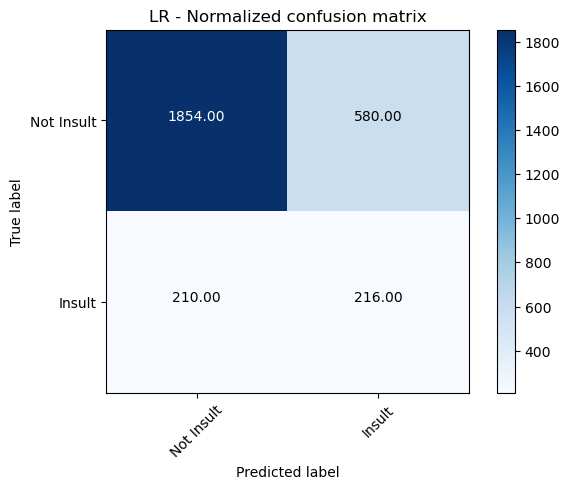

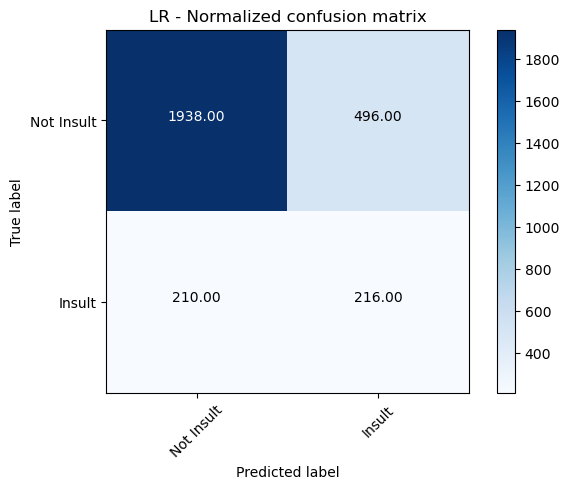

Logistic Regression (Word Gram): ROC Curve
LogisticRegression AUC (Word Gram): 0.722843153139599


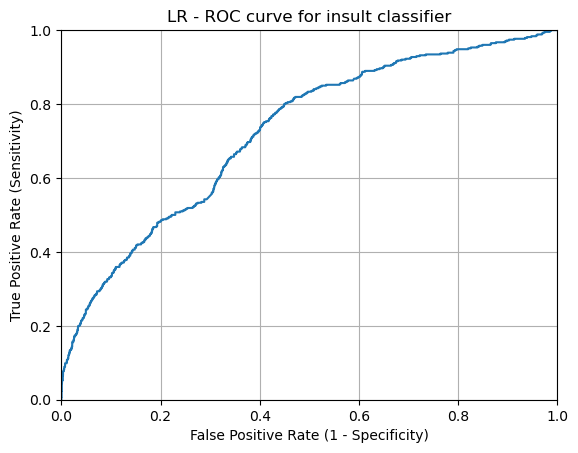

Logistic Regression (Character Gram): ROC Curve
LogisticRegression AUC (Character Gram): 0.7217924087940406


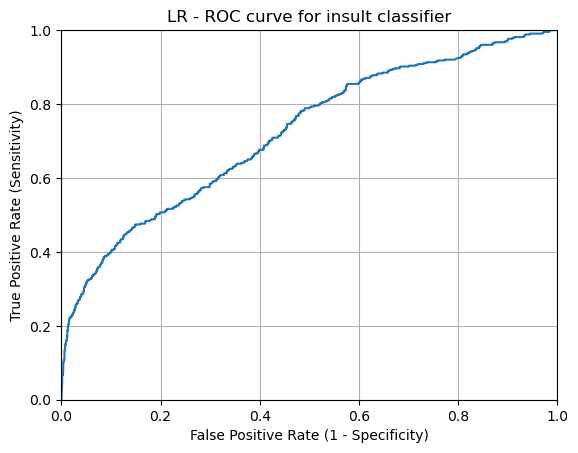

In [113]:
# Confusion Matrix for Logistic Regression Classifier on Word - N-grams
cnf_matrix_w = confusion_matrix(ptest.Insult, predicted_lr_w)
np.set_printoptions(precision=2)
plt.figure()
print('Logistic Regression (Word Gram): ', end='')
plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'],
                      title='LR - Normalized confusion matrix')


# Confusion Matrix for Logistic Regression Classifier on Character - N-grams
cnf_matrix_c = confusion_matrix(ptest.Insult, predicted_lr_c)
np.set_printoptions(precision=2)
plt.figure()
print('Logistic Regression (Character Gram): ', end='')
plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'],
                      title='LR - Normalized confusion matrix')
plt.show()


# ROC Curve and AUC for Logistic Regression Classifier on Word - N-grams
print('Logistic Regression (Word Gram): ROC Curve')
print('LogisticRegression AUC (Word Gram):', roc_auc_score(ptest.Insult, predicted_lr_w_prob[:, 1:]))

fpr, tpr, _ = roc_curve(ptest.Insult, predicted_lr_w_prob[:, 1:])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('LR - ROC curve for insult classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()


# ROC Curve and AUC for Logistic Regression Classifier on Character - N-grams
print('Logistic Regression (Character Gram): ROC Curve')
print('LogisticRegression AUC (Character Gram):', roc_auc_score(ptest.Insult, predicted_lr_c_prob[:, 1:]))

fpr, tpr, _ = roc_curve(ptest.Insult, predicted_lr_c_prob[:, 1:])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('LR - ROC curve for insult classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

A function that detects if the text is an insult or not

In [111]:
def classify_insult(text, model, tfidf_vectorizer):
    # Preprocess the text (sanitize_wo_stopwords function)
    preprocessed_text = sanitize_wo_stopwords(text)

    # Extract TF-IDF features for the preprocessed text
    text_features = tfidf_vectorizer.transform([preprocessed_text])

    # Predict with probabilities using the provided model
    predicted_probabilities = model.predict_proba(text_features)

    # Predict the class label (0 for not an insult, 1 for insult)
    predicted_label = model.predict(text_features)

    # Return both the label and the probabilities
    return {
        "label": predicted_label[0],
        "probabilities": predicted_probabilities[0]
    }

# Example usage:
text_to_classify = "hello"
result = classify_insult(text_to_classify, insult_nb_w, tfidf_w)

if result["label"] == 1:
    print("The text is an insult.")
else:
    print("The text is not an insult.")

# Print the probability scores for both classes
insult_probability = result["probabilities"][1]  # Probability of being an insult
not_insult_probability = result["probabilities"][0]  # Probability of not being an insult

print(f"Insult Probability: {insult_probability}")
print(f"Not Insult Probability: {not_insult_probability}")


The text is an insult.
Insult Probability: 0.6001393732613636
Not Insult Probability: 0.39986062673863604


## 5. Evaluation

We test the performance of our model on the verification dataset

In [115]:
# Load the verification dataset
verify_df = pd.read_csv('dataset/impermium_verification_labels.csv')

# Initialize lists to store predicted labels and probabilities
predicted_labels = []
insult_probabilities = []

# Iterate through the comments in the verification dataset
for comment in verify_df['Comment']:
    result = classify_insult(comment, insult_nb_w, tfidf_w)
    predicted_labels.append(result["label"])
    insult_probabilities.append(result["probabilities"][1])

# True labels from the verification dataset
true_labels = verify_df['Insult']

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy: {accuracy:.2f}")

# Calculate ROC-AUC
roc_auc = roc_auc_score(true_labels, insult_probabilities)
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.76
ROC-AUC: 0.93


# III. ***Third way***

**Training an ANN and extracting features using TfidfVectorizer** 

Epoch 1/7
104/104 [==============================] - 19s 147ms/step - loss: 0.6915 - accuracy: 0.5132 - val_loss: 0.7039 - val_accuracy: 0.6101
Epoch 2/7
104/104 [==============================] - 9s 87ms/step - loss: 0.6633 - accuracy: 0.6002 - val_loss: 0.7088 - val_accuracy: 0.6720
Epoch 3/7
104/104 [==============================] - 11s 109ms/step - loss: 0.5329 - accuracy: 0.7595 - val_loss: 0.6401 - val_accuracy: 0.7822
Epoch 4/7
104/104 [==============================] - 10s 94ms/step - loss: 0.3316 - accuracy: 0.8949 - val_loss: 0.6233 - val_accuracy: 0.7951
Epoch 5/7
104/104 [==============================] - 11s 104ms/step - loss: 0.1961 - accuracy: 0.9482 - val_loss: 0.8549 - val_accuracy: 0.6766
Epoch 6/7
104/104 [==============================] - 10s 97ms/step - loss: 0.1174 - accuracy: 0.9798 - val_loss: 0.8272 - val_accuracy: 0.7871
Epoch 7/7
104/104 [==============================] - 10s 93ms/step - loss: 0.0755 - accuracy: 0.9859 - val_loss: 1.0135 - val_accuracy: 0.75

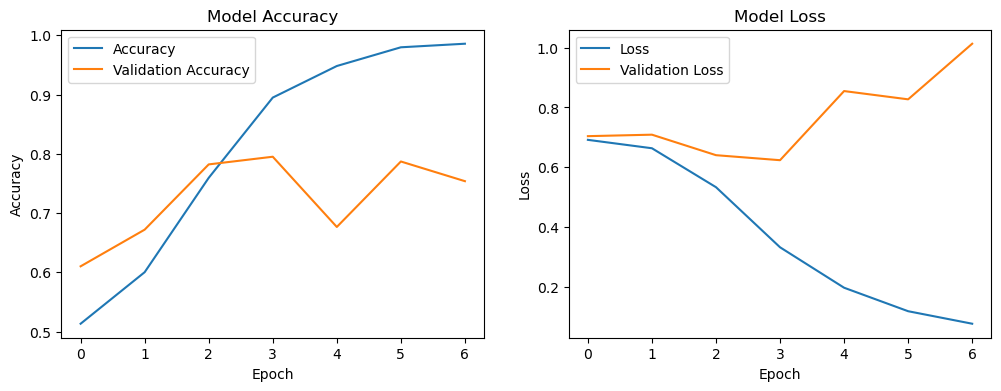

In [108]:
import pandas as pd
import nltk                                # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import re                                  # library for regular expression operations
import string                              # for string operations
import spacy
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import word_tokenize, sent_tokenize   # module for tokenizing strings
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import itertools
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Load the required Spacy model
nlp = spacy.load('en_core_web_sm')

def sanitize_wo_stopwords(sentence):
    doc = nlp(sentence)
    s = []
    for token in doc:
        if str(token.pos_) != 'SPACE' and not token.is_stop:
            s.append(token.text)
    return ' '.join(s)

def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

def train_insult_model():
    # Processed Data
    full_df = process_comment(comments)  # Assuming you have a function process_comment
    verify_df = pd.read_csv('dataset\impermium_verification_labels.csv')
    pdata = pd.concat([full_df, verify_df], ignore_index=True)

    # Preprocess the comments
    pdata.Comment = [x[1: -1] for x in pdata.Comment]
    
    pdata_ni = pdata.query('Insult == 0')
    pdata_i = pdata.query('Insult == 1')

    ptrain_ni, ptest_ni = train_test_split(pdata_ni, test_size=0.6)
    ptrain_i, ptest_i = train_test_split(pdata_i, test_size=0.2)

    ptrain = pd.concat([ptrain_i, ptrain_ni], ignore_index=True)
    ptest = pd.concat([ptest_i, ptest_ni], ignore_index=True)

    # Create the ensemble model
    pipe_svm_w = Pipeline([
        ('tfidf_w', TfidfVectorizer(ngram_range=(1, 3), use_idf=False, analyzer='word', max_features=50000)),
        ('svm_w', LogisticRegression()),
    ])

    pipe_lr_w = Pipeline([
        ('tfidf_w', TfidfVectorizer(ngram_range=(1, 3), use_idf=False, analyzer='word', max_features=50000)),
        ('lr_w', LogisticRegression()),
    ])

    vote_clf = VotingClassifier(
        estimators=[
            ('svm_w', pipe_svm_w),
            ('lr_w', pipe_lr_w),
        ],
        voting='soft'
    )

    # Preprocess the data for the neural network
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), use_idf=False, analyzer='word', max_features=50000)
    X_train = tfidf_vectorizer.fit_transform(ptrain.Comment)
    X_test = tfidf_vectorizer.transform(ptest.Comment)
    y_train = ptrain.Insult
    y_test = ptest.Insult

    # Create and train a simple neural network
    model = create_model(X_train.shape[1])
    history = model.fit(X_train.toarray(), y_train, validation_data=(X_test.toarray(), y_test), epochs=7, batch_size=32, verbose=1)

    # Plot accuracy and loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    def predict_insult(text):
        preprocessed_text = sanitize_wo_stopwords(text)
        X_text = tfidf_vectorizer.transform([preprocessed_text])
        logits = model.predict(X_text)[0][0]
        probability = 1 / (1 + np.exp(-logits))  # Apply the sigmoid function
        return logits, probability
    return model, predict_insult

# Train the insult prediction model
trained_model, predict_insult = train_insult_model()



In [112]:
# Now you can use predict_insult to predict insults and get probability estimates
text_to_predict = "hey you fucker"

is_insult, probabilities = predict_insult(text_to_predict)
print(f"Is Insult: {is_insult}")
print(f"Probabilities: {probabilities}")


1/1 [==============================] - 0s 236ms/step
Is Insult: 0.33752721548080444
Probabilities: 0.5835897455519552


## 5. Evaluation

Here we will test the performance of our on the verification dataset

In [109]:
import pandas as pd

# Load the verification dataset
verify_df = pd.read_csv('dataset/impermium_verification_labels.csv')

# Create a list to store the model's predictions
predictions = []

for comment in verify_df['Comment']:
    _, probability = predict_insult(comment)
    predictions.append(probability)

# Add the predictions to the verification dataset
verify_df['Predicted_Probability'] = predictions

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

true_labels = verify_df['Insult']
predicted_probabilities = verify_df['Predicted_Probability']

# Calculate accuracy
accuracy = accuracy_score(true_labels, (predicted_probabilities >= 0.5).astype(int))

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, (predicted_probabilities >= 0.5).astype(int))
recall = recall_score(true_labels, (predicted_probabilities >= 0.5).astype(int))
f1 = f1_score(true_labels, (predicted_probabilities >= 0.5).astype(int))

# Calculate ROC-AUC
roc_auc = roc_auc_score(true_labels, predicted_probabilities)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


1/1 [==============================] - 0s 42ms/step
Accuracy: 0.48
Precision: 0.48
Recall: 1.00
F1-Score: 0.65
ROC-AUC: 0.91
